# Self-study Lab 2: Cost Function

## Objectives

1. Implement and explore the cost function for linear regression with one variable
2. Implement the cost function for linear regression with both two paraneter $w$ and $b$
3. Visualize the cost function as a function of one parameter $w$ while fixing parameter $b$
4. Visualize the cost function as a function of two parameters $w$ and $b$

## Tools

In this lab we make use of

1. Numpy, popular library for scientific computing
2. Matplotlib, a popular library fro plotting data
3. The decorator `@interact` avaiable in Python

In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

## Problem statement

Please revisit the problem statement described in **self-study lab 1**. Basically, we want to predict the medical cost based on the age of patient. In this notebook, we reuse the data set provided in **self-study lab 1**.

Age | Charges 
----| -----------
18  | 2020
25  | 3000

So, we shall write code that are mostly available from **self-study lab 1**

In [32]:
x_train = np.array([18, 25])
y_train = np.array([2020, 3000])

## Computing Cost

The term ***cost*** in this assignment might be a little confusing since the data is the medical cost or *charges* to avoid the flash of vocab. In optimization theory and in our lecture particularly, cost is a measure how well our model is prediciting the target values of the data. The term charge is used instead of the medical cost.

The equation for ***cost*** with one variable is
\begin{equation}\tag{1}
J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2,
\end{equation}
where
\begin{equation}\tag{2}
f_{w,b}(x^{(i)}) = w x^{(i)} + b
\end{equation}

- $f_{w,b}(x^{(i)})$ is the prediction for example $i$ using the parameters $w, b$
- $(f_{w,b}(x^{(i)})^2 - y^{(i)})^2$ is the squared difference between the target value and the prediction
- These differences are then summed up over all the $m$ training examples and divided by $2m$ to produce the cost function $J(w,b)$. 

**Remark** 

In lecture, summation ranges are from $1$ to $m$, while in the code they will be from `0` to `m-1`. The reason is, again, Python indexing starts from $0$. In later Jupyter Notebooks, we will write the running index from $1$ and it should be clear from the lecture presentation. The Python code implements with the running index from $0$ though.

In [33]:
def compute_cost_with_for(x, y, w, b):
    """
    Compute the cost function for linear regression
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters
        for linear regression to fit the data points in x and y
    """
    
    m = x.shape[0]    # number of training examples
    cost_sum = 0
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

**Challenge**

Now come back to the above function and try to re-write it without using the `for` loop. Instead, it is sufficient to use the function `np.sum()` in the Numpy array. Moreover, the possibility to remove the `for` loop in Python programming and replace the same calulations by Numpy calluation will speed up the computations dramatically.

In [34]:
def compute_cost(x, y, w, b):
    """
    Compute the cost function for linear regression
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters
        for linear regression to fit the data points in x and y
    """
    m = x.shape[0]
    f_wb = w * x + b
    difference_sqr = (f_wb - y)**2
    cost = np.sum(difference_sqr) / (2 * m)
    
    return cost

In [35]:
w_test = 150
b_test = -350
print(f"cost with for-loop = {compute_cost_with_for(x_train, y_train, w=w_test, b=b_test)}")
print(f"cost with np.sum = {compute_cost(x_train, y_train, w=w_test, b=b_test)}")

cost with for-loop = 67225.0
cost with np.sum = 67225.0


## Cost Function Intuition

Our goal is to find a model $f_{w,b} = w x + b$ with parameters $w$ and $b$ which will accurately predict the medical charges given an input age. Again, of course this is an oversimplified prediction model. Predicting the medical chrage based on just age is clearly not a good idea. That's why we learn multivariate linear regression later. The cost is a measure of how accurate the model performs on the training data.

The cost equation (1) above shows that if $w$ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2$ term will be zero and the cost minimized. In this simple two point example, you can achieve this! 

Nevertheless, we can easily imagine a situation where three data points are not in the same line, there is no way we can fit a straight line to such three data points. In this case, the differences $(f_{w,b}(x^{(i)}) - y^{(i)})^2$ in Eq. (1) for all the training examples can not simultaneously vanish and thus the cost function (as half of the mean value of the squared differences) cannot be equal to zero. In contrast, if three or more data points are in the same line, of course there is always one straight line to fit them all. In such a case, the cost function can achieve the miniumum value of exactly zero because the sum of all squared differences in Eq. (1) are the sum of all zeros for the right parameter values $w$ and $b$.

We will illustrate the above discussion in the following code snippets.

Before we illustrate the above discussion, let us try to solve the linear regression problem using two different approaches we learned from the lecture

1. Using existing library sklearn
2. Using normal equation
3. Using Gradient descent

We will particular revisit the **Gradient Descent** in more depth in the end of this notebook and in the next self-study lab.

### Using `sklearn.linear_model.LinearRegression`

First, let us try to obtain the model parameters using existing library from `sklearn`.

In [36]:
from sklearn.linear_model import LinearRegression

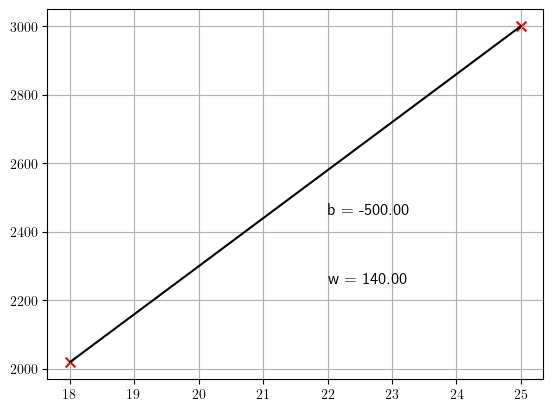

In [37]:
linear_regr = LinearRegression()
X_train = x_train.reshape(-1, 1)
linear_regr.fit(X_train, y_train)
w = linear_regr.coef_[0]
b = linear_regr.intercept_

plt.scatter(x_train, y_train, marker='x', c='r', s=50)
xx = np.array([x_train.min(), x_train.max()])
ff = w * xx + b
plt.plot(xx, ff, 'k-')
plt.text(22, 2250, f'w = {w:.2f}', fontsize=12)
plt.text(22, 2450, f'b = {b:.2f}', fontsize=12)

plt.grid(True)

In [38]:
print("min_{w,b} [J(w, b)] = " + f"{compute_cost(x_train, y_train, w, b):.5f}")

min_{w,b} [J(w, b)] = 0.00000


### Normal equation

In the nutshell, the sklearn implemented the normal equation to compute the model parameters.

In [39]:
m = x_train.shape[0]
vect_one = np.ones(m)
X = np.vstack((vect_one, x_train)).T
A = X.T @ X
r = X.T @ y_train
Theta = np.linalg.solve(A, r)
b = Theta[0]
w = Theta[1]
print(f"Theta = {Theta}")
print(f"b = {b:.2f}")
print(f"w = {w:.2f}")

Theta = [-500.  140.]
b = -500.00
w = 140.00


In [40]:
print("min_{w,b} [J(w, b)] = " + f"{compute_cost(x_train, y_train, w, b):.5f}")

min_{w,b} [J(w, b)] = 0.00000


## Gradient descent

In [41]:
def compute_cost_grad(x, y, w, b):
    f_wb = w * x + b
    diff = (f_wb - y)
    dJ_dw = 1/m * np.sum(diff * x, axis=0)
    dJ_db = 1/m * np.sum(diff, axis=0)
    return dJ_dw, dJ_db

To double-check whether the function `compute_cost_grad` has been implemented correctly, we can check the output against the numerical derivative by finite difference. For example, if $g(x)$ is a function of $x$, then its derivative can be approximated by the finite difference formula

$$g^{\prime}(x_0) = \frac{g(x+ \epsilon) - g(x - \epsilon)}{2\epsilon}$$

where $\epsilon$ is a small number. In our case, $J(w,b)$ is a function of two variables. The partial derivative of $J$ with respect to (w.r.t.) $w$ and $b$ can be approximated according to

\begin{equation*}
\begin{aligned}
\frac{\partial J}{\partial w}(w_0, b_0) &\approx \frac{J(w_0 + \epsilon, b_0) - J(w_0 - \epsilon, b_0)}{2\epsilon}, \\
\frac{\partial J}{\partial w}(w_0, b_0) &\approx \frac{J, b_0 + \epsilon) - J(w_0, b_0+ \epsilon)}{2\epsilon}.
\end{aligned}
\end{equation*}

Normally, it is safe to choose $\epsilon = 10^{-6}$, slightly larger or slightly smaller.

In [42]:
# Let us test the definition of compute_cost_grad
dJ_dw, dJ_db = compute_cost_grad(x_train, y_train, w=w_test, b=b_test)

eps = 1e-8
J_plus = compute_cost(x_train, y_train, w=w_test+eps, b=b_test)
J_minus = compute_cost(x_train, y_train, w=w_test-eps, b=b_test)
approx = (J_plus - J_minus) / (2*eps)
print(f"dJ_dw (exact vs approximation): {dJ_dw:.2f} -- {approx:.12f}")

J_plus = compute_cost(x_train, y_train, w=w_test, b=b_test + eps)
J_minus = compute_cost(x_train, y_train, w=w_test, b=b_test - eps)
approx = (J_plus - J_minus) / (2*eps)
print(f"dJ_db (exact vs approximation): {dJ_db:.2f} -- {approx:.12f}")

dJ_dw (exact vs approximation): 7970.00 -- 7969.999569468200
dJ_db (exact vs approximation): 365.00 -- 364.996958523989


In [50]:
alpha = 0.0025          # learning rate alpha
nmax = 5000
w, b = 100, -400
for step in range(nmax):
    dJ_dw, dJ_db = compute_cost_grad(x_train, y_train, w, b)
    w = w - alpha * dJ_dw
    b = b - alpha * dJ_db

print(f"w = {w}")
print(f"b = {b}")

w = 136.6636734507124
b = -426.37204691398586


We can wrap all the gradient descent procedure into a common function for easy use later.

In [52]:
def gradient_descent(x_train, y_train, initial_parameter, alpha, num_iterations, cost_grad):
    w, b = initial_parameter
    for step in range(num_iterations):
        dJ_dw, dJ_db = cost_grad(x_train, y_train, w, b)
        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db
        
    return w, b

w, b = gradient_descent(x_train, y_train, initial_parameter=(100, -400), 
                          alpha=0.0025, num_iterations=15000, cost_grad=compute_cost_grad)
print(f"w = {w}")
print(f"b = {b}")

w = 138.2480037738393
b = -461.3359501712509


In [53]:
print("min_{w,b} [J(w, b)] = " + f"{compute_cost(x_train, y_train, w, b):.5f}")

min_{w,b} [J(w, b)] = 19.29677


### Discussion

Before we move on, let us reflect on what we have just learned. We can see that both `sklearn.linear_model` and the use of *normal equation* give the same and exact results. That means the parameters $w$ and $b$ given by these two approaches are truly the exact values according to the theory (of course except probably the machine error). In our example, we are kinda lucky as $w$ and $b$ for the model are just two whole numbers.

Moreover, we have to set the learning rate rather small, in this case $\alpha = 0.0025$, to obtain the converged solution. If we slightly increase the learning rate, say $\alpha = 0.0045$, the gradient descent does not work and diverges. The problem is that the target value $y^{(i)}$ are larger than the input value $x^{(i)}$ by multiple magnitude. As a result, we may expect that the gradient of the cost function is rather large. One can come back to the last example on computing the gradident of the cost function to see the partial derivatives $\frac{\partial J}{\partial w}, \frac{\partial J}{\partial w}$ at the test parameters $w^{t}, b^{t} = (150, -350)$ as specified above. Therefore, the magnitudes of the incremental terms $\alpha\frac{\partial J}{\partial w}, \alpha\frac{\partial J}{\partial w}$ depends on how large the learning rate $\alpha$ is.

Now, as promised we come back to the situation where we have three data points which are not in the same line. In this example, we study the data table 
Age | Charges 
----| -----------
18  | 2020
25  | 3000
30  | 3100

As there is no straight line going through all three data points, we can expect that the cost function according to Eq. (1) cannot vanish with any values of $w$ and $b$. Mathematically speaking, the three equations
\begin{equation}
f_{w,b}(x^{(i)}) = w x^{(i)} + b \quad i = 1,2 ,3
\end{equation}
cannot be solved for only two unknowns $w$ and $b$. Therefore, we try to minimize $J(w,b)$ to find the best straight line that is most close to all the data points.



In [55]:
x_train = np.array([18, 25, 30])
y_train = np.array([2020, 3000, 3100])
linear_regr = LinearRegression()
linear_regr.fit(x_train.reshape(-1, 1), y_train)
# reference value for comparison with gradient descent result
w_ref = linear_regr.coef_[0]         
b_ref = linear_regr.intercept_

print(f"w = {w_ref}")
print(f"b = {b_ref}")

w = 93.21100917431193
b = 438.5321100917431


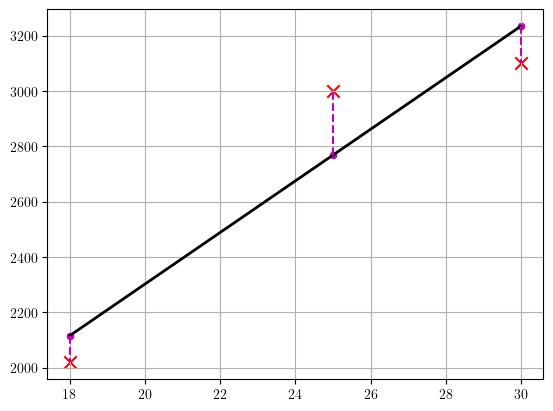

In [56]:
plt.scatter(x_train, y_train, marker='x', color='r', s=80)
xx = np.array([18, 30])
ff = w * xx + b
plt.plot(xx, ff, 'k-', lw=2)

yy = w * x_train + b
m = x_train.shape[0]
plt.plot(np.vstack((x_train, x_train)), np.vstack((yy, y_train)), 'm--', lw=1.5)
plt.scatter(x_train, yy, marker='o', color='m', s=20)
# for j in range(m):
#     plt.plot([x_train[j], x_train[j]], [yy[j], y_train[j]], 'm--', lw=1.5)
plt.grid(True)

In [57]:
print("min_{w,b} [J(w, b)] = " + f"{compute_cost(x_train, y_train, w, b):.5f}")

min_{w,b} [J(w, b)] = 13486.23853


## Interaction

In [58]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

# If you want to have the interaction faster, set it False
# The following command is to make all the text in plots accept
# latex format
plt.rcParams['text.usetex'] = False

In [59]:
w_exact = 140
b_exact = -500
w_range = w_exact + np.array([-50, 55])
b_range = b_exact + np.array([-50, 55])
tmp_b = b_exact

w_array = np.arange(*w_range, 2.5)
cost = np.zeros_like(w_array)
for i in range(len(w_array)):
    tmp_w = w_array[i]
    cost[i] = compute_cost(x_train, y_train, tmp_w, tmp_b)

In [60]:
@interact(w=(*w_range,2.5), b=(*b_range, 2.5), continous_update=False)
def func(w=140, b=-500):
    plt.scatter(w, b, marker='o', color='r', s=150)
    plt.plot(w_range, b*np.ones(2), 'k-.')
    plt.plot(w*np.ones(2), b_range, 'k-.')
    plt.grid(True)
    plt.axis([w_range[0], w_range[1], b_range[0], b_range[1]])
    plt.xlabel('$w$', fontsize=16)
    plt.ylabel('$b$', fontsize=16)
    plt.show()

interactive(children=(FloatSlider(value=140.0, description='w', max=195.0, min=90.0, step=2.5), FloatSlider(va…

In [61]:
tmp_b = -500

@interact(w=(*w_range, 5.0), continuous_update=False)
def func(w=150):
    f_wb = np.dot(x_train, w) + tmp_b
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)
    fig.canvas.toolbar_position = 'bottom'
    ax[0].scatter(x_train, y_train, marker='x', s=80, color='r')
    f_wb = np.dot(x_train, w) + tmp_b
    ax[0].plot(x_train, f_wb, lw=2)
    for j in range(len(x_train)):
        ax[0].vlines(x_train[j], y_train[j], f_wb[j], color='m', ls='--', lw=1.5)
    ax[0].grid(True)
    
    # plt_house_x(x_train, y_train, f_wb=f_wb, ax=ax[0])
    ax[1].plot(w_array, cost, 'k-')
    ax[1].grid(True)
    current_cost = compute_cost(x_train, y_train, w, tmp_b)
    ax[1].scatter(w, current_cost, s=100, color='m', zorder=10, label=f"cost at w={w}")
    ax[1].set_xlabel('$w$', fontsize=18)
    ax[1].set_ylabel('$J(w,b=b_0)$', fontsize=18)
    fig.suptitle(f"Minimize Cost: Current Cost = {current_cost:0.0f}", fontsize=14)
    plt.show()

interactive(children=(FloatSlider(value=150.0, description='w', max=195.0, min=90.0, step=5.0), Output()), _do…

## Regarding cost function versus iteration steps

Let us now study the cost function in more detail. Particularly, we will study how they increase or decrease by using different learning rate $\alpha$. We will observe the history of the of the cost function $J^{[t]} = J(w^{[t]}, b^{[t]})$ over all the iteration steps $t = 0, 1, 2, \ldots$. To do this, let us re-write the `gradient_descent` function but this time we will store the history of both the cost function and the learning parameters, namely $w^{[t]}, b^{[t]}$. In the end, the plot can be made using these histories.

In [171]:
def gradient_descent(x_train, y_train, initial_parameter, alpha, num_iterations, func_value, func_grad):
    """
    Performs gradient descent to fit w, b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha
    
    Arguments:
        x_train (ndarray (m,))  : Data, m examples 
        y_train (ndarray (m,))  : target values
        w_in,b_in (scalar): initial values of model parameters  
        alpha (float):     Learning rate
        num_iters (int):   number of iterations to run gradient descent
        func_value: function to call to produce cost
        func_grad: function to call to produce gradient
        
    Return:
        w (scalar): Updated value of parameter after running gradient descent
        b (scalar): Updated value of parameter after running gradient descent
        J_history (List)   : History of cost values
        para_history (list): History of parameters [w,b] 
    """
    J_history = np.zeros(num_iterations)
    para_history = np.zeros((num_iterations, 2))
    w, b = initial_parameter
    
    for step in range(num_iterations):
        
        dJ_dw, dJ_db = func_grad(x_train, y_train, w, b)
        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db
        
        # save cost J at each iteration
        if i < 1e5:
            J_history[step] = func_value(x_train, y_train, w, b)
            para_history[step,:] = np.array([w, b]) 
        if step % np.ceil(num_iterations/10) == 0:
            print(f"Iteration {step:5d}: Cost = {J_history[step]:.2f}, w = {w:.2f}, b = {b:.3f}")
    return w, b, J_history, para_history

w_final, b_final, J_history, para_history = gradient_descent(x_train, y_train, initial_parameter=(90, 410), 
                                                 alpha=0.0025, num_iterations=10000, 
                                                 func_value=compute_cost, func_grad=compute_cost_grad)
print("="*56)
print(f"w = {w:.8f}, w_ref = {w_ref:.8f}")
print(f"b = {b:.8f}, b_ref = {b_ref:.8f}")
print("="*56)

Iteration     0: Cost = 15213.04, w = 96.68, b = 410.267
Iteration  1000: Cost = 13499.23, w = 94.23, b = 412.824
Iteration  2000: Cost = 13496.91, w = 94.13, b = 415.226
Iteration  3000: Cost = 13495.01, w = 94.05, b = 417.404
Iteration  4000: Cost = 13493.45, w = 93.97, b = 419.378
Iteration  5000: Cost = 13492.16, w = 93.90, b = 421.168
Iteration  6000: Cost = 13491.11, w = 93.83, b = 422.791
Iteration  7000: Cost = 13490.24, w = 93.77, b = 424.262
Iteration  8000: Cost = 13489.53, w = 93.72, b = 425.595
Iteration  9000: Cost = 13488.94, w = 93.67, b = 426.804
w = 93.77864761, w_ref = 93.21100917
b = 424.15544370, b_ref = 438.53211009


### Challenge

Try to play around with the learning rate. Particularly, you should try to increase the learning rate $\alpha$ to see the gradient descent diverges. After that, you can make the learning rate extremely small, e.g., $\alpha = 10^{-5}$ and choose the initialization for the learning parameters far from the reference (exact) solution $w_\mathrm{ref}, b_\mathrm{ref}$. Then you can see slow convergence. This motivates us to gradually increase the learning rate but do not allow it to exceed a hiden critical value where the gradient descent will diverge.

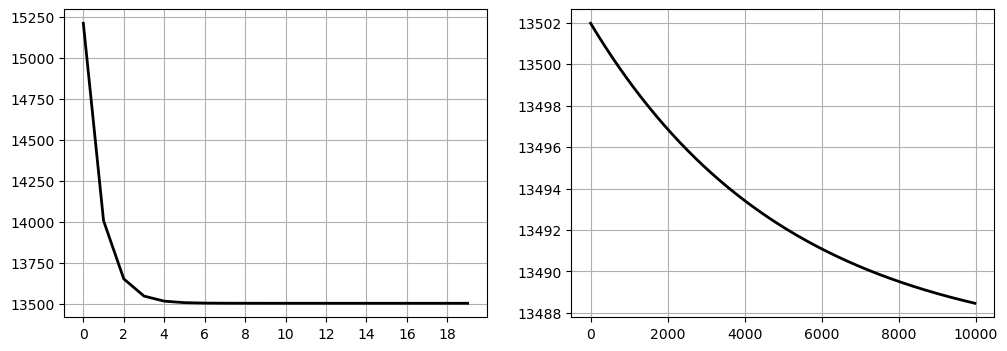

In [123]:
fig, ax = plt.subplots(1, 2, constrained_layout=False, figsize=(12, 4))
ax[0].plot(np.arange(20), J_history[:20], 'k-', linewidth=2.0)
ax[0].set_xticks(np.arange(0,20,2))
ax[0].grid(True)
ax[1].plot(J_history[20:], 'k-', linewidth=2.0)
ax[1].grid(True)

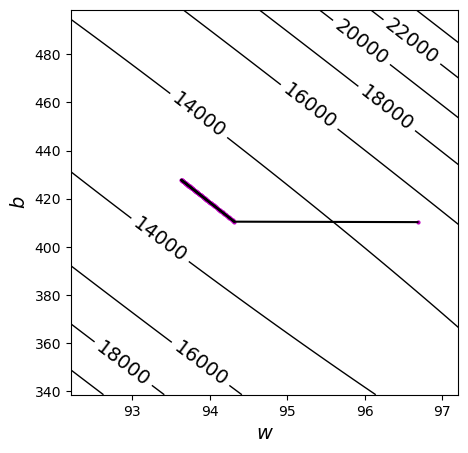

In [158]:
w_range = np.linspace(w_ref-1, w_ref+4, 201)
b_range = np.linspace(b_ref-100, b_ref+60, 101)
W, B = np.meshgrid(w_range, b_range)
Z = np.zeros_like(W)
# Compute cost function according to the mesh (W, B)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i,j] = compute_cost(x_train, y_train, W[i,j], B[i,j])
        
fig, ax = plt.subplots(figsize=(5, 5))
CS = ax.contour(W, B, Z, linewidths=1, colors='k')
ax.clabel(CS, inline=True, fontsize=14)
ax.set_xlabel('$w$', fontsize=14)
ax.set_ylabel('$b$', fontsize=14)

w_points = para_history[::100,0]
b_points = para_history[::100,1]
plt.scatter(w_points, b_points, marker='o', color='m', s=4)
# plt.arrow(w_points[0], b_points[0], w_points[1]-w_points[0], b_points[1] - b_points[0],
#          length_includes_head=True, head_width=0.1)
for i in range(len(w_points)-1):
    plt.plot(w_points[i:i+2], b_points[i:i+2], 'k-', lw=1.5)

# As we initialize the learning parameters close to the reference (exact) parameter solution, the convergence
# cannot be seen clearly from this example. If you want to see it clear, try to come up with simple data set
# and modify the parameters used in the plot functions to observe.